<a href="https://colab.research.google.com/github/VincentCammarano/ML-Project2/blob/master/80EditDistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd
import numpy as np
from tabulate import tabulate
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import *
from google.colab import files
from scipy.spatial import distance
from numpy.ma.core import mean







In [ ]:
#upload the 1000 files
uploaded = files.upload()


Saving 1.txt to 1.txt
Saving 2.txt to 2.txt
Saving 3.txt to 3.txt
Saving 4.txt to 4.txt
Saving 5.txt to 5.txt
Saving 6.txt to 6.txt
Saving 7.txt to 7.txt
Saving 8.txt to 8.txt
Saving 9.txt to 9.txt
Saving 10.txt to 10.txt
Saving 11.txt to 11.txt
Saving 12.txt to 12.txt
Saving 13.txt to 13.txt
Saving 14.txt to 14.txt
Saving 15.txt to 15.txt
Saving 16.txt to 16.txt
Saving 17.txt to 17.txt
Saving 18.txt to 18.txt
Saving 19.txt to 19.txt
Saving 20.txt to 20.txt
Saving 21.txt to 21.txt
Saving 22.txt to 22.txt
Saving 23.txt to 23.txt
Saving 24.txt to 24.txt
Saving 25.txt to 25.txt
Saving 26.txt to 26.txt
Saving 27.txt to 27.txt
Saving 28.txt to 28.txt
Saving 29.txt to 29.txt
Saving 30.txt to 30.txt
Saving 31.txt to 31.txt
Saving 32.txt to 32.txt
Saving 33.txt to 33.txt
Saving 34.txt to 34.txt
Saving 35.txt to 35.txt
Saving 36.txt to 36.txt
Saving 37.txt to 37.txt
Saving 38.txt to 38.txt
Saving 39.txt to 39.txt
Saving 40.txt to 40.txt
Saving 41.txt to 41.txt
Saving 42.txt to 42.txt
Saving 43.

In [4]:
df = pd.DataFrame(columns=['<x>', '<y>', '<z>', '<t>'])
for nbr in range(1,1001):
  path = str(nbr) + '.txt'
  with open(path,"r") as f:
    lines = f.readlines()
  with open(str(nbr) + '_table.txt', 'w') as fw:
    ptr = 1
    for line in lines:
      if ptr > 4:
        fw.write(line)
      ptr += 1
  data_add = pd.read_table(str(nbr) + "_table.txt",delimiter=',')
  df = pd.concat([df,data_add], ignore_index=True)
  print(data_add.shape, df.shape)

#%%

with open('total_data.txt', 'w') as fw:
  fw.write(df.to_csv(header=True, index=False,sep=','))
files.download('total_data.txt')

#%% md




(127, 4) (127, 4)
(128, 4) (255, 4)
(172, 4) (427, 4)
(98, 4) (525, 4)
(117, 4) (642, 4)
(110, 4) (752, 4)
(109, 4) (861, 4)
(118, 4) (979, 4)
(107, 4) (1086, 4)
(118, 4) (1204, 4)
(137, 4) (1341, 4)
(119, 4) (1460, 4)
(108, 4) (1568, 4)
(103, 4) (1671, 4)
(115, 4) (1786, 4)
(96, 4) (1882, 4)
(89, 4) (1971, 4)
(94, 4) (2065, 4)
(88, 4) (2153, 4)
(88, 4) (2241, 4)
(88, 4) (2329, 4)
(83, 4) (2412, 4)
(86, 4) (2498, 4)
(90, 4) (2588, 4)
(91, 4) (2679, 4)
(95, 4) (2774, 4)
(90, 4) (2864, 4)
(86, 4) (2950, 4)
(95, 4) (3045, 4)
(95, 4) (3140, 4)
(133, 4) (3273, 4)
(117, 4) (3390, 4)
(118, 4) (3508, 4)
(145, 4) (3653, 4)
(112, 4) (3765, 4)
(116, 4) (3881, 4)
(130, 4) (4011, 4)
(111, 4) (4122, 4)
(114, 4) (4236, 4)
(133, 4) (4369, 4)
(110, 4) (4479, 4)
(113, 4) (4592, 4)
(110, 4) (4702, 4)
(103, 4) (4805, 4)
(104, 4) (4909, 4)
(111, 4) (5020, 4)
(123, 4) (5143, 4)
(111, 4) (5254, 4)
(77, 4) (5331, 4)
(86, 4) (5417, 4)
(98, 4) (5515, 4)
(111, 4) (5626, 4)
(90, 4) (5716, 4)
(100, 4) (5816, 4)
(1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:


#%%
url = "https://raw.githubusercontent.com/VincentCammarano/gestureRecognition/main/total_data.txt?token=GHSAT0AAAAAABULUGR674RLQR4ISLKKEQBKYTY26DQ"
df = pd.read_csv(url,delimiter=',')
df
data = np.array(df)
d_points = data[:,:-1]
print(d_points)

#%% md

data = np.array(df)
d_points = data[:,:-1]
print(d_points)

[[ 0.042075  0.036799  0.25838 ]
 [ 0.041904  0.037187  0.258505]
 [ 0.041739  0.037219  0.258619]
 ...
 [ 0.126849 -0.070454  0.278912]
 [ 0.126905 -0.070754  0.278601]
 [ 0.127055 -0.070855  0.278318]]
[[ 0.042075  0.036799  0.25838 ]
 [ 0.041904  0.037187  0.258505]
 [ 0.041739  0.037219  0.258619]
 ...
 [ 0.126849 -0.070454  0.278912]
 [ 0.126905 -0.070754  0.278601]
 [ 0.127055 -0.070855  0.278318]]


In [6]:

#%%

scaler = StandardScaler()
scaled_d_points = scaler.fit_transform(d_points)




In [7]:
print(scaled_d_points.shape)

(85095, 3)


In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state = 0)
scaled_d_points = pca.fit_transform(scaled_d_points)

[3 3 3 3 3 3 3 3 3 3]
nbr iter : 43
SSE : 25553.469412479863
center :
 [[-0.62678278  0.19626312]
 [-0.52417324  1.35887816]
 [ 0.81947169 -1.26669455]
 [ 0.31170677 -0.06053389]
 [-1.69512212  0.56566806]
 [-0.27364631 -1.17264224]
 [ 0.96927759  1.51484009]
 [ 1.41947181 -0.24174941]
 [ 2.55234021  0.81407848]
 [-1.2904914  -0.58645935]]
['c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'a', 'a', 'a', 'a', 'a

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9
0,0.000000,1.167134,2.057158,0.972989,1.130402,1.413721,2.070279,2.092609,3.238598,1.026238
1,1.167134,0.000000,2.949409,1.647248,1.414321,2.543887,1.501572,2.517889,3.124379,2.090833
2,2.057158,2.949409,0.000000,1.308682,3.111388,1.097157,2.785566,1.187650,2.707850,2.216904
3,0.972989,1.647248,1.308682,0.000000,2.102259,1.256751,1.707104,1.122489,2.405283,1.686309
4,1.130402,1.414321,3.111388,2.102259,0.000000,2.245510,2.828419,3.217549,4.254720,1.221116
5,1.413721,2.543887,1.097157,1.256751,2.245510,0.000000,2.960983,1.932152,3.454455,1.173705
6,2.070279,1.501572,2.785566,1.707104,2.828419,2.960983,0.000000,1.813362,1.731229,3.085776
7,2.092609,2.517889,1.187650,1.122489,3.217549,1.932152,1.813362,0.000000,1.548600,2.731799
8,3.238598,3.124379,2.707850,2.405283,4.254720,3.454455,1.731229,1.548600,0.000000,4.090093
9,1.026238,2.090833,2.216904,1.686309,1.221116,1.173705,3.085776,2.731799,4.090093,0.000000


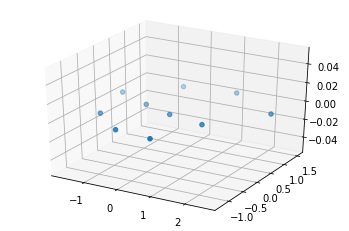

In [19]:
kmeans = KMeans(
    init="random",
    n_clusters=10,
    n_init=100,
    max_iter=300,
    random_state=2022
    )
kmeans.fit(scaled_d_points)

#%%

print(kmeans.labels_[:10])
print("nbr iter :", kmeans.n_iter_)
print("SSE :", kmeans.inertia_)
print("center :\n", kmeans.cluster_centers_)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], cmap='Greens');

#%%

kmeans.code = []
for i in range(len(kmeans.labels_)):
  kmeans.code.append(chr(kmeans.labels_[i] + 96))
print(kmeans.code)
print(len(kmeans.code),len(kmeans.labels_))

#%%

code = []
for i in range(1,11):
  code.append(chr(i + 96))
code = np.array([code])
print(code.shape)
matrice_center_code =  np.concatenate([kmeans.cluster_centers_,np.transpose(code)],axis=1)

#%%

#créer une matrice 26*26 avec les distances
matrice_dist = np.zeros((10,10))
for i in range(0,10):
  for j in range(0,10):
    matrice_dist[i,j] = distance.euclidean(kmeans.cluster_centers_[i],kmeans.cluster_centers_[j])
print(matrice_dist)

#%%

with open('matrice_dist.txt', 'w') as fw:
  df = pd.DataFrame(matrice_dist)
  fw.write(df.to_csv(header=True, index=False,sep=','))
files.download('matrice_dist.txt')

#%%

df = pd.read_csv('matrice_dist.txt',delimiter=',')
matrice_dist = np.array(df)
df

#%%




In [20]:

data_with_code = []
for nbr in range(1,1001):
  path = str(nbr) + '_table.txt'
  df = pd.read_csv(path,delimiter=',')
  data = np.array(df)
  data = data[:,:-1]
  data = pca.fit_transform(data)
  d_points = scaler.fit_transform(data)
  
  clusters = kmeans.predict(d_points,)
  code = ''
  for i in range(len(clusters)):
    code = code + chr(clusters[i] + 96)
  if((floor((nbr-1)/10) + 1)%10 == 0):
    data_with_code.append([floor((nbr-1)/100) + 1, 10, code]) #user, class, code
  else:
    data_with_code.append([floor((nbr-1)/100) + 1, (floor((nbr-1)/10) + 1)%10, code]) #user, class, code
print(len(data_with_code),data_with_code)


#%%

with open('data_with_code.txt', 'w') as fw:
  df = pd.DataFrame(data_with_code)
  fw.write(df.to_csv(header=True, index=False,sep=','))
files.download('data_with_code.txt')

#%%

df = pd.read_csv("data_with_code.txt",delimiter=',')
data_with_code = np.array(df)
df

#%%

1000 [[1, 1, 'iiiiiiiiiiiiiiiiieeeeeeeeeeeeeeeebbbbbbbbbbbbbbbbbgggggggggggggggggffffffffffffffffffaaaaaaaaaaaaaaaaaddddddddd`iiiiiiiiiiiiiii'], [1, 1, '`````````````aaaaaaaaaaaffffffffffffffffggggggggggggggggggggbbbbbbbbbbbbbbbeeeeeeeeeeeeeeeeiiiiiiiiiiiiii```````````````````````'], [1, 1, 'iiiiiiiiiiiiiiiiieeeeeeeeeeeeebbbbbbbbbbbbbbbbbbbbggggggggggggggggggggggggggffffffffffffffffffffffffaaaaaaaaaaaaaaaaaaaaaaa````````````````````iiiiiiiiiiiiiiiiiiiiiiiiiiiii'], [1, 1, 'i`````````iiiiiiiieeeeeeeeeeebbbbbbbbbbbbggggggggggghfffffffffffffaaaaaaaaaaa`````````````````````'], [1, 1, '``````````````````aaaaaaaaaaaaaaffffffffffffffffhggggggggggggggbbbbbbbbbbbbbeeeeeeeeeeeeeeeeeeeiiiiiiii``````````````'], [1, 1, 'eeeiiiiiiiiiiiiiiddddddddaaaaaaaaaaaaaaaaffffffffffffffgggggggggggggggbbbbbbbbbbbbbeeeeeeeeeeeeeeeiiiiiiiiiiii'], [1, 1, 'iiiiiii`````````aaaaaaaaaaaaaaaffffffffffffffffgggggggggggggggbbbbbbbbbbbbbeeeeeeeeeeeeeeiiiiiiiiiii`````````'], [1, 1, 'iiiiiii```````````aaaaaaaaaaaaaaaaaafffff

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,0,1,2
0,1,1,iiiiiiiiiiiiiiiiieeeeeeeeeeeeeeeebbbbbbbbbbbbb...
1,1,1,`````````````aaaaaaaaaaaffffffffffffffffgggggg...
2,1,1,iiiiiiiiiiiiiiiiieeeeeeeeeeeeebbbbbbbbbbbbbbbb...
3,1,1,i`````````iiiiiiiieeeeeeeeeeebbbbbbbbbbbbggggg...
4,1,1,``````````````````aaaaaaaaaaaaaaffffffffffffff...
...,...,...,...
995,10,10,eeeiiiiiiddddddddaaaaaaaaaffffffffffcccccccccc...
996,10,10,eeeeiiiiiiiiidddddddaaaaaaaaaaffffffffffgggccc...
997,10,10,eebbbbbbbbbgggggggggghhhfffffffffffffaaaaaaaaa...
998,10,10,iiiiiiiii`ddddaaaaaaaaaaaaaaaafffffffffccccccc...


In [21]:
#algorithme : dynamic time warping
def dynamic_time_warping(data_with_code, code_predict, matrice_dist):
   min_D = float('inf')
   min_cluster = -1
   for i in range(data_with_code.shape[0]):
     g = matrice_dist[ord(data_with_code[i,2][1])-96,ord(code_predict[1])-96] #g(1,1)
     for t in range(1,min(len(data_with_code[i,2]),len(code_predict))):
       g_horizontal = matrice_dist[ord(data_with_code[i,2][t - 1])-96,ord(code_predict[t])-96] #g(i-1,j)
       g_vertical = matrice_dist[ord(data_with_code[i,2][t])-96,ord(code_predict[t - 1])-96] #g(i,j-1)
       g_diagonal = matrice_dist[ord(data_with_code[i,2][t - 1])-96,ord(code_predict[t - 1])-96] #g(i-1,j-1)
       g += min(g_horizontal,g_vertical,g_diagonal)
     D = g/(len(data_with_code[i,2]) + len(code_predict))
     if min_D > D:
       min_D = D
       min_cluster = data_with_code[i,1]
   #print(data_with_code[i,2],(code_predict))
   return ([min_D, min_cluster])


#%%

delete_one_line = np.delete(data_with_code, (610), axis=0)
print(data_with_code[610,2],data_with_code[610,1])
code_predict = data_with_code[610,2]
min_D, min_cluster = dynamic_time_warping(delete_one_line, code_predict, matrice_dist)
print(min_D,min_cluster)



bbbbbbbbbgggggggggggggggggggggggcccccc`````````````````iiiieeeeeeeeeeeeeeiiii````aaaaaaaaaaa 2
0.016825960144320685 2


In [22]:
#%%

#do the cross validation dynamic time warping
result = []
for user in range(1,11):
  test_set = []
  training_set = []
  for i in range(data_with_code.shape[0]):
    if(data_with_code[i,0] == user):
      test_set.append([data_with_code[i,0], data_with_code[i,1], data_with_code[i,2]])
    else:
      training_set.append([data_with_code[i,0], data_with_code[i,1], data_with_code[i,2]])
  test_set = np.array(test_set)
  training_set = np.array(training_set)
  print(test_set.shape,training_set.shape)

  nbr_success = 0
  for v in range(test_set.shape[0]):
    min_D, min_cluster = dynamic_time_warping(training_set, test_set[v,2], matrice_dist)
    if min_cluster == test_set[v,1]:
      nbr_success += 1
    else :
      print(min_cluster, test_set[v,1])
  result.append(nbr_success/test_set.shape[0])
print(result)

#%%

mean(result)

#%%



(100, 3) (900, 3)
8 1
6 3
6 3
6 3
2 3
10 4
8 4
8 4
8 4
8 4
8 4
8 5
4 5
4 5
4 5
10 5
3 5
8 5
10 6
5 6
8 6
8 6
8 7
8 7
8 7
8 7
6 9
8 9
10 9
5 9
5 9
3 9
5 10
3 10
3 10
(100, 3) (900, 3)
4 1
10 1
9 1
10 1
5 1
5 1
7 2
5 2
7 2
5 2
5 2
9 2
4 3
5 3
5 3
5 3
5 3
7 3
5 3
9 3
5 3
9 3
10 4
10 4
10 4
5 4
5 4
5 4
5 4
5 4
5 4
5 4
9 5
8 5
9 5
9 5
9 5
9 5
9 5
9 5
9 5
9 5
7 6
10 6
3 6
9 6
5 6
9 6
1 6
10 6
1 6
9 7
9 7
9 7
1 7
9 7
5 7
1 7
9 7
1 7
9 7
9 8
5 8
5 8
1 8
9 8
5 8
1 8
5 8
8 9
5 9
5 9
5 9
5 10
5 10
1 10
5 10
(100, 3) (900, 3)
7 1
8 2
2 3
2 3
8 4
8 4
8 4
8 4
1 4
8 4
4 5
4 5
8 5
4 5
1 5
4 6
2 7
8 7
8 7
1 9
8 9
1 9
4 10
(100, 3) (900, 3)
7 1
3 2
4 2
4 3
9 3
6 3
6 3
6 3
1 3
5 3
1 3
1 4
1 4
1 4
1 4
8 4
8 4
9 5
8 5
9 5
9 5
8 5
8 5
8 5
4 5
8 5
3 6
3 6
3 6
3 6
3 6
3 6
3 6
3 7
8 7
8 7
8 7
1 7
5 8
8 9
7 9
5 10
3 10
3 10
3 10
3 10
3 10
(100, 3) (900, 3)
8 1
8 1
8 1
8 1
7 1
9 3
2 4
4 5
8 5
7 5
1 5
8 6
3 7
3 7
3 7
3 9
9 10
8 10
(100, 3) (900, 3)
8 1
9 1
4 1
3 2
3 2
2 4
2 4
5 4
1 5
8 5
7 5
2 5
8 5
8 5
3 6
3 6
3

0.6759999999999999

In [23]:
#algorithme : edit distance
def edit_distance(data_with_code, code_predict):
  min_D = float('inf')
  min_cluster = -1
  for i in range(data_with_code.shape[0]):
    x = data_with_code[i,2]
    y = code_predict
    dist = 0
    index_y = 0
    index_x = 0
    new_word = ''
    while index_y < len(y) - 1 or index_x < len(x) - 1:
      if index_y < len(y) - 1 and index_x < len(x) - 1:
        if x[index_x] == y[index_y]: # no transformation
          new_word += y[index_y]
          index_x += 1
          index_y += 1
        elif x[index_x + 1] == y[index_y]: #deletion
          dist += 1
          index_x += 1
        elif x[index_x] == y[index_y + 1]: #insertion
          new_word += y[index_y]
          dist += 1
          index_y += 1
        else: #substitution
          new_word += y[index_y]
          dist += 1
          index_x += 1
          index_y += 1
      elif index_x == len(x) - 1: #insertion end of the code y
        if x[index_x] == y[index_y]: # no transformation
          new_word += y[index_y]
          index_x += 1
          index_y += 1
        elif x[index_x] == y[index_y + 1]: #insertion
          new_word += y[index_y]
          dist += 1
          index_y += 1
        else: #substitution
          new_word += y[index_y]
          dist += 1
          index_x += 1
          index_y += 1
        while index_y != len(y):
          new_word += y[index_y]
          dist += 1
          index_y += 1
      else: #deletion end of the code x
        if x[index_x] == y[index_y]: # no transformation
          new_word += y[index_y]
          index_x += 1
          index_y += 1
        elif x[index_x + 1] == y[index_y]: #deletion
          dist += 1
          index_x += 1
        else: #substitution
          new_word += y[index_y]
          dist += 1
          index_x += 1
          index_y += 1
        while index_x != len(x):
          dist += 1
          index_x += 1
    #print(y,', ', new_word)
    if min_D > dist:
       min_D = dist
       min_cluster = data_with_code[i,1]
  return ([min_D, min_cluster])

#%%

delete_one_line = np.delete(data_with_code, (684), axis=0)
code_predict = data_with_code[684,2]
min_D, min_cluster = edit_distance(delete_one_line, code_predict)
print(data_with_code[684,2],data_with_code[684,1])
print(min_D,min_cluster,)

#%%

#do the cross validation dynamic time warping
result = []
for user in range(1,11):
  test_set = []
  training_set = []
  for i in range(data_with_code.shape[0]):
    if(data_with_code[i,0] == user):
      test_set.append([data_with_code[i,0], data_with_code[i,1], data_with_code[i,2]])
    else:
      training_set.append([data_with_code[i,0], data_with_code[i,1], data_with_code[i,2]])
  test_set = np.array(test_set)
  training_set = np.array(training_set)
  print(test_set.shape,training_set.shape)

  nbr_success = 0
  for v in range(test_set.shape[0]):
    min_D, min_cluster = edit_distance(training_set, test_set[v,2])
    if min_cluster == test_set[v,1]:
      nbr_success += 1
    else :
      print(min_cluster, test_set[v,1])
  result.append(nbr_success/test_set.shape[0])
print(result)

#%%

mean(result)

#%%

#$1 recognizer
#logistic regression or SVM

cccccccccccccceeeeeeeeeeeeeeeeeeeiiiiiiiiiiidddddddddddaaaaaaaaaaaaaaaaaaaaaa`````cccccccceeebbbbbbbbbbbbbbbbbggggggggggghhhhhffffffffffffffffccccccccccce 9
37 9
(100, 3) (900, 3)
6 3
2 4
1 5
3 5
2 5
10 6
3 6
2 6
2 6
6 9
3 9
4 9
3 9
(100, 3) (900, 3)
5 1
3 1
3 1
5 1
8 1
5 2
5 2
5 2
1 2
5 3
5 3
5 3
5 3
8 3
8 3
5 3
5 3
3 4
3 4
3 4
5 4
5 4
3 4
3 4
8 4
5 4
5 4
3 5
8 5
3 6
3 6
3 6
7 6
3 6
3 6
8 6
3 6
10 7
2 7
8 7
8 7
8 7
8 7
8 7
8 7
8 7
8 7
4 9
3 9
2 9
8 9
7 9
8 10
8 10
8 10
8 10
(100, 3) (900, 3)
2 3
2 4
2 4
8 5
8 5
10 5
10 6
2 7
5 7
5 7
5 10
(100, 3) (900, 3)
7 1
7 1
7 1
3 2
7 2
5 3
8 3
8 3
6 3
6 3
6 3
6 3
6 3
4 3
8 4
8 4
3 5
7 5
3 5
1 5
3 5
8 5
3 6
3 6
3 6
3 6
3 6
3 6
3 6
3 6
3 6
3 7
(100, 3) (900, 3)
3 1
7 1
7 1
7 1
2 3
1 5
7 5
3 5
3 6
4 6
3 7
3 7
8 10
8 10
(100, 3) (900, 3)
4 1
3 2
3 4
7 5
3 5
3 6
3 6
3 6
3 6
3 6
10 8
1 9
(100, 3) (900, 3)
3 1
8 1
10 4
1 5
1 7
1 7
1 7
1 7
1 7
1 7
5 7
1 9
1 10
1 10
1 10
1 10
(100, 3) (900, 3)
3 2
6 3
10 3
6 3
6 3
10 3
6 3
6 3
1 5
4 6
2 6
1 6
3 6
3 7
3 9

0.8089999999999999

In [24]:
from sklearn.svm import SVC

sv =  SVC (random_state=0)

In [25]:
#do the cross validation dynamic time warping
result = []
for user in range(1,11):
  test_set = []
  training_set = []
  for i in range(data_with_code.shape[0]):
    if(data_with_code[i,0] == user):
      test_set.append([data_with_code[i,0], data_with_code[i,1], data_with_code[i,2]])
    else:
      training_set.append([data_with_code[i,0], data_with_code[i,1], data_with_code[i,2]])
  test_set = np.array(test_set)
  training_set = np.array(training_set)
  print(test_set.shape,training_set.shape)

  nbr_success = 0
  for v in range(test_set.shape[0]):
    sv.fit(training_set, test_set[v, 2])
    min_D, min_cluster = sv.predict(training_set, test_set[v,2])
    if min_cluster == test_set[v,1]:
      nbr_success += 1
    else :
      print(min_cluster, test_set[v,1])
  result.append(nbr_success/test_set.shape[0])
print(result)

#%%

mean(result)

(100, 3) (900, 3)


ValueError: ignored